In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. 데이터 불러오기&결측치 확인

데이터프레임 정보
- netflix: 넷플릭스 회원 데이터

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [4]:
card = pd.read_csv('/content/drive/My Drive/스터디/오프라인 1회차 (23.10.14)/음식+업종(한식,일식,+중식,+양식,+패스트푸드점)+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')
card.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,한식,1,1,7,2.392000e+05
1,201901,한식,1,10,1618,4.671496e+07
2,201901,한식,1,20,150194,4.961334e+09
3,201901,한식,1,30,564787,2.006319e+10
4,201901,한식,1,40,817438,2.954471e+10


In [5]:
# 형태 확인
card.shape

(3781, 6)

In [6]:
# 컬럼명을 더 직관적으로 변경
# 열 이름 변경을 위한 딕셔너리 생성
new_column_names = {'crym': '기준년월', 'tco_btc_nm': '업종 구분', 'ma_fem_dc': '성별', 'agegrp_dc':'연령대', 'tco_btc_u_ct':'이용 건수', 'tco_btc_u_am':'이용 금액'}

# 열 이름 변경 적용
card.rename(columns=new_column_names, inplace=True)

In [7]:
# 결측치 확인
card.isnull().sum()

기준년월     0
업종 구분    0
성별       0
연령대      0
이용 건수    0
이용 금액    0
dtype: int64

항목정의서에서 '성별'컬럼의 결측치는 '-'로 표기되어 있으므로 해당값 확인

In [8]:
card.loc[card['성별']=='-']
# 해당 값 없음

,기준년월,업종 구분,성별,연령대,이용 건수,이용 금액


In [9]:
# 남녀 무관은? -> 없음
card.loc[card['성별']==9]

,기준년월,업종 구분,성별,연령대,이용 건수,이용 금액


In [10]:
card.loc[card['성별']==1]

,기준년월,업종 구분,성별,연령대,이용 건수,이용 금액
0,201901,한식,1,1,7,2.392000e+05
1,201901,한식,1,10,1618,4.671496e+07
2,201901,한식,1,20,150194,4.961334e+09
3,201901,한식,1,30,564787,2.006319e+10
4,201901,한식,1,40,817438,2.954471e+10
...,...,...,...,...,...,...
3767,202109,패밀리레스토랑,1,50,10143,2.959295e+08
3768,202109,패밀리레스토랑,1,60,2569,7.289928e+07
3769,202109,패밀리레스토랑,1,70,508,1.479358e+07
3770,202109,패밀리레스토랑,1,80,118,3.509950e+06


In [11]:
# 데이터 타입
card.dtypes

기준년월       int64
업종 구분     object
성별         int64
연령대        int64
이용 건수      int64
이용 금액    float64
dtype: object

In [12]:
# 이용 금액의 지수표현을 정수로 변환해보려고 했으나 변환하면 inf로 표기됨,,,,챗지피티가 inf 범위는 못늘린대서 그냥 둔다
float16_min = np.finfo('float16').max
var = np.array([float16_min*20, float16_min*-20], dtype=np.float16)
print(var)

[ inf -inf]


#2. 시각화

In [13]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

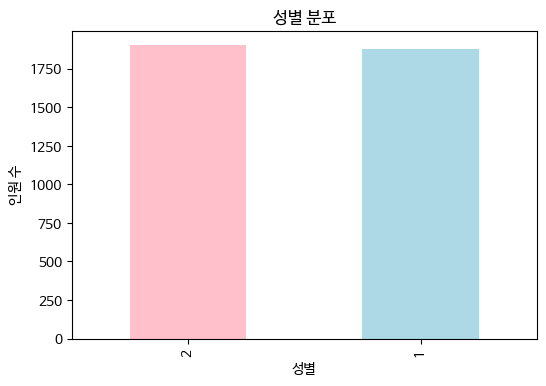

In [16]:
#성별: 남녀 모두 별 차이가 없었으나 여성이 근소하게 앞서고 있음
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

gender_distribution = card['성별'].value_counts()

# 그래프 그리기
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color=['pink', 'lightblue'])
plt.title('성별 분포')
plt.xlabel('성별')
plt.ylabel('인원 수')

# 그래프 표시
plt.show()

In [30]:
#진짜로 앞서는지 확인
card['성별'].value_counts()

2    1902
1    1879
Name: 성별, dtype: int64

- 연령대별 고객 분포

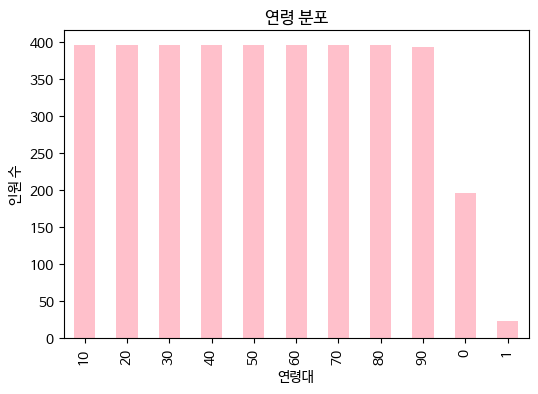

In [17]:
age_distribution = card['연령대'].value_counts()

# 그래프 그리기
plt.figure(figsize=(6, 4))
age_distribution.plot(kind='bar', color=['pink'])
plt.title('연령 분포')
plt.xlabel('연령대')
plt.ylabel('인원 수')

# 그래프 표시
plt.show()

In [33]:
# 저 그래프가 맞는건가
card['연령대'].value_counts()
#0, 1을 제외하면 모두 동일한 수로, 별 의미가 없었음

10    396
20    396
30    396
40    396
50    396
60    396
70    396
80    396
90    394
0     196
1      23
Name: 연령대, dtype: int64

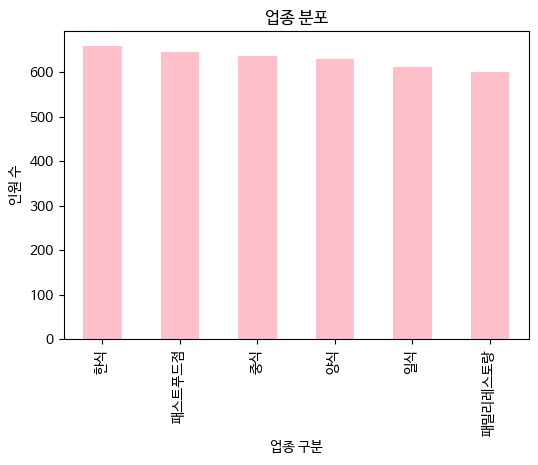

In [18]:
kind_distribution = card['업종 구분'].value_counts()

# 그래프 그리기
plt.figure(figsize=(6, 4))
kind_distribution.plot(kind='bar', color=['pink'])
plt.title('업종 분포')
plt.xlabel('업종 구분')
plt.ylabel('인원 수')

# 그래프 표시
plt.show()

차이가 크지 않으나, **한식-패스트푸드점-중식-양식-일식-패밀리레스토랑** 순으로 방문 인원이 많았음

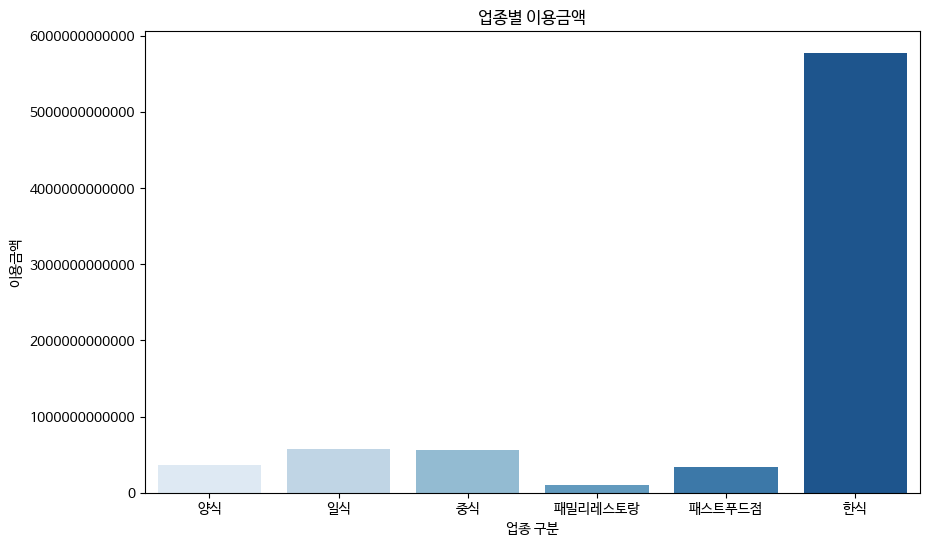

In [40]:
# 업종별 이용금액
result = card.groupby('업종 구분')['이용 금액'].sum()
plt.figure(figsize=(10, 6))
ax= sns.barplot(x=result.index, y=result, palette='Blues')
plt.title('업종별 이용금액')
plt.xlabel('업종 구분')
plt.ylabel('이용금액')

ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# 그래프 표시
plt.show()

- 업종 구분의 분포에서는 큰 차이를 보이지 않았으나, 이용 금액 면에서는 한식이 아주 압도적인 수치를 보였음.
- 업종별 이용건수도 따로 산출하려고 했으나, 동행인이 있는 경우에는 수치가 겹칠 것 같아 제외함

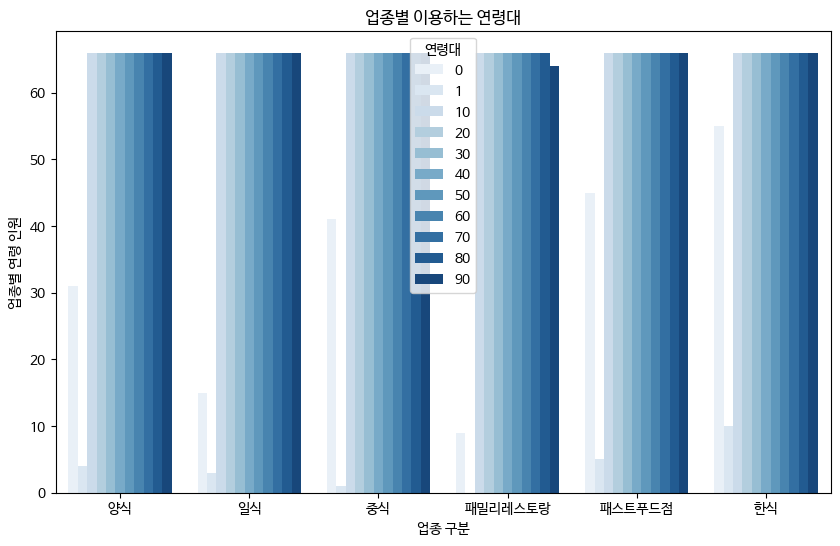

In [28]:
# '업종 구분' 별 '연령대' 개수를 세기
result = card.groupby(['업종 구분', '연령대']).size().reset_index(name='업종별 연령 인원')

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.barplot(x='업종 구분', y='업종별 연령 인원', hue='연령대', data=result, palette='Blues')
plt.title('업종별 이용하는 연령대')
plt.xlabel('업종 구분')
plt.ylabel('업종별 연령 인원')

# 그래프 표시
plt.show()

# 이것도 90대 패밀리레스토랑이 낮은걸 제외하고는 딱히 살펴볼 필요는 없어보임

- 날짜별 이용 건수

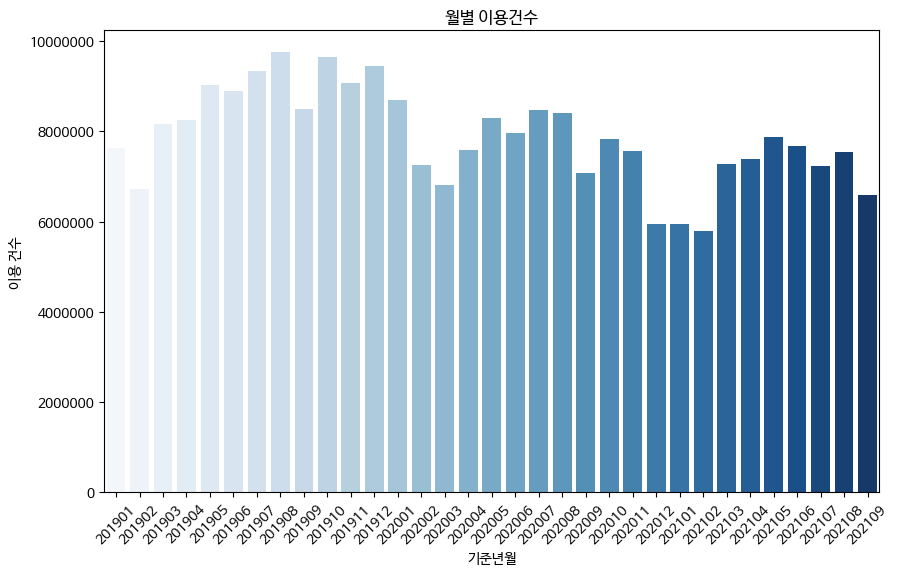

In [42]:
from matplotlib.ticker import FuncFormatter

# 업종별 이용금액
people = card.groupby('기준년월')['이용 건수'].sum()

plt.figure(figsize=(10, 6))
ax=sns.barplot(x=people.index, y=people, palette='Blues')
plt.title('월별 이용건수')
plt.xlabel('기준년월')
plt.ylabel('이용 건수')

# y축 레이블을 지수에서 실수로 변환하는 함수 정의
def y_formatter(x, pos):
    return f'{x:.0f}'  # 실수 형태로 표시

# y_formatter 함수를 적용하여 y축 레이블 설정
ax.yaxis.set_major_formatter(FuncFormatter(y_formatter))

# x축 레이블 각도 설정
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

1. 보통 연초보다는 3월부터 증가추세를 보였고, 포물선 형태를 보임
2. 19년-20년-21년 순으로 이용 건수가 감소하는 모습을 보임